In [2]:
#dependencies
import pandas as pd
import numpy as np
import seaborn as sns
#Matlab style plotting
from matplotlib import pyplot as plt
%matplotlib inline

#Advance style plotting
import seaborn as sns
color =sns.color_palette()
sns.set_style('darkgrid')

In [4]:
# Parsing Date columns
train = pd.read_csv('Train.csv',parse_dates=['TransactionStartTime','PaidOnDate','DueDate','IssuedDateLoan'])
test = pd.read_csv('Test.csv',parse_dates=['TransactionStartTime','IssuedDateLoan'])
sample =  pd.read_csv('sample_submission.csv')
unlinked_masked_final = pd.read_csv('unlinked_masked_final.csv',parse_dates=['TransactionStartTime'])

In [12]:
train.sample(4)

,CustomerId,TransactionStartTime,Value,Amount,TransactionId,BatchId,SubscriptionId,CurrencyCode,CountryCode,ProviderId,...,LoanId,PaidOnDate,IsFinalPayBack,InvestorId,DueDate,LoanApplicationId,PayBackId,ThirdPartyId,IsThirdPartyConfirmed,IsDefaulted
72,CustomerId_136,2018-11-08 20:40:08,21800.0,-20000.0,TransactionId_2290,BatchId_1260,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_513,2018-12-08 07:34:43,1.0,InvestorId_1,2018-12-08 20:40:01,LoanApplicationId_189,PayBackId_678,ThirdPartyId_1783,1.0,0.0
1337,CustomerId_213,2019-02-17 05:58:42,1000.0,-1000.0,TransactionId_1953,BatchId_2350,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_1516,2019-05-07 14:09:34,1.0,InvestorId_1,2019-03-19 05:58:37,LoanApplicationId_904,PayBackId_644,ThirdPartyId_118,1.0,0.0
760,CustomerId_310,2019-01-21 17:00:07,1750.0,-1750.0,TransactionId_1467,BatchId_94,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_788,2019-02-01 08:42:32,1.0,InvestorId_1,2019-02-20 17:00:03,LoanApplicationId_961,PayBackId_2037,ThirdPartyId_1853,1.0,0.0
524,CustomerId_350,2018-12-23 19:20:15,2000.0,-2000.0,TransactionId_2297,BatchId_1667,SubscriptionId_7,UGX,256,ProviderId_1,...,LoanId_263,2019-01-29 17:00:10,1.0,InvestorId_1,2019-01-22 19:20:09,LoanApplicationId_432,PayBackId_543,ThirdPartyId_300,1.0,0.0


# UNIVARIATE ANALYSIS ON TRAIN SET

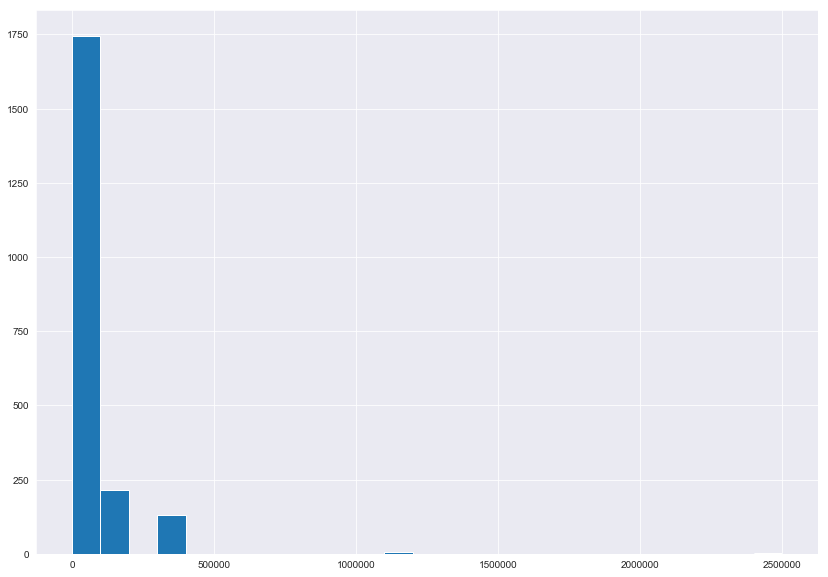

In [6]:

histogram_Value =train.Value.hist(bins =25, figsize=[14,10])

#the distribution is skewed to one side i.e there are outliers.. we will deal with that later

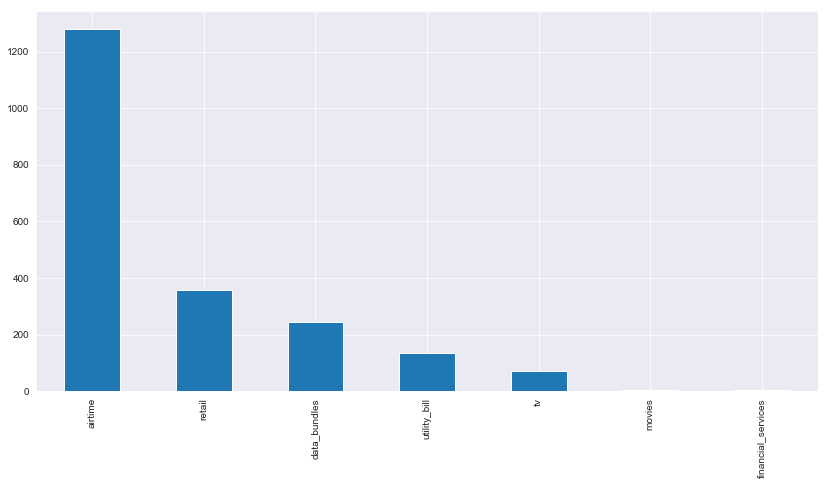

In [8]:
train['ProductCategory'].value_counts().plot(kind ='bar', figsize=[14,7])

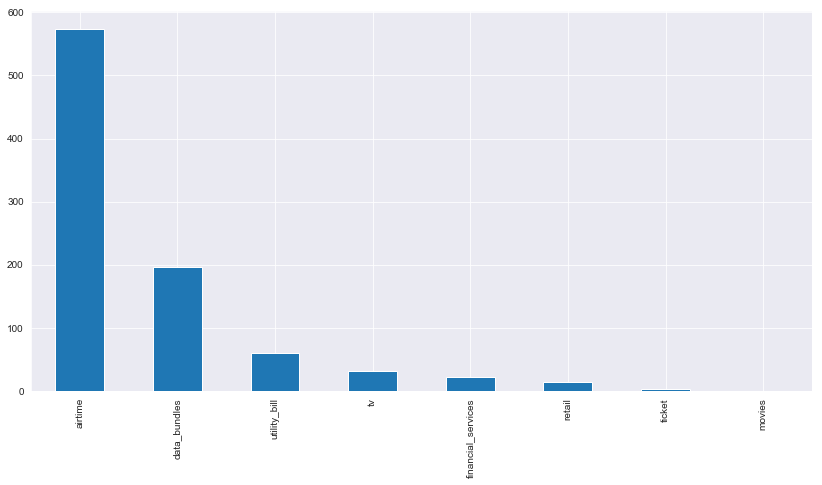

In [9]:
test['ProductCategory'].value_counts().plot(kind ='bar', figsize=[14,7])

#airtime has highest occurance compare to others, the same trend is observerd in the test set, then isolating airtime from other features will be a good feature.
#lesser people opt in for movies in both train and test set.. reducing the feature by grouping movies/ticket as the same will helps

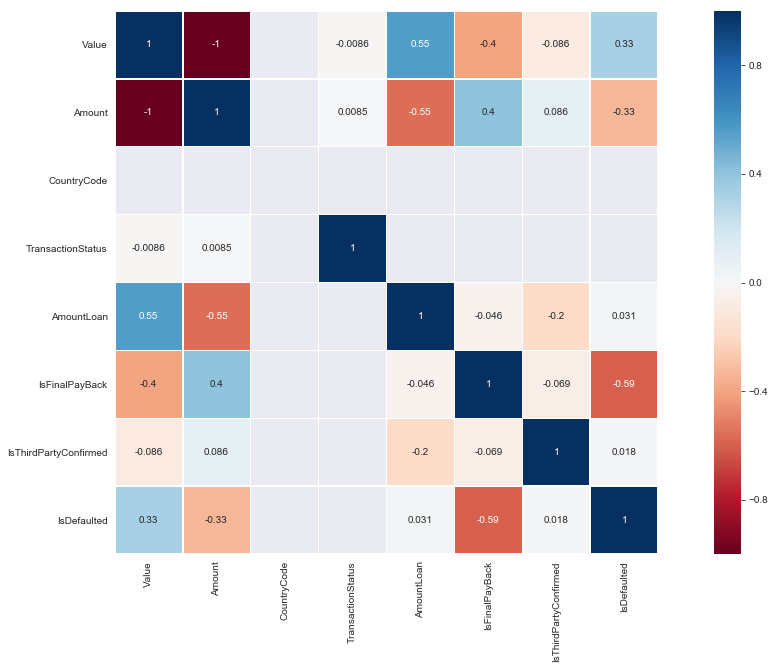

In [10]:
#correlelogram- plot heatmap to find correlation among features
corrmat =train.corr()
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corrmat, square=True, annot=True,linewidth=0.8, cmap='RdBu')

#only the value features has a good correlation to the target, others has no or slight correlation between xo-xn features.
and excessive feature engineering will enhance the correlation for good modelling.
#we will review the correlation after feature engineering has been carried out on the notebook

# BIVARIATE ANALYSIS

C:\Users\adegunle\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


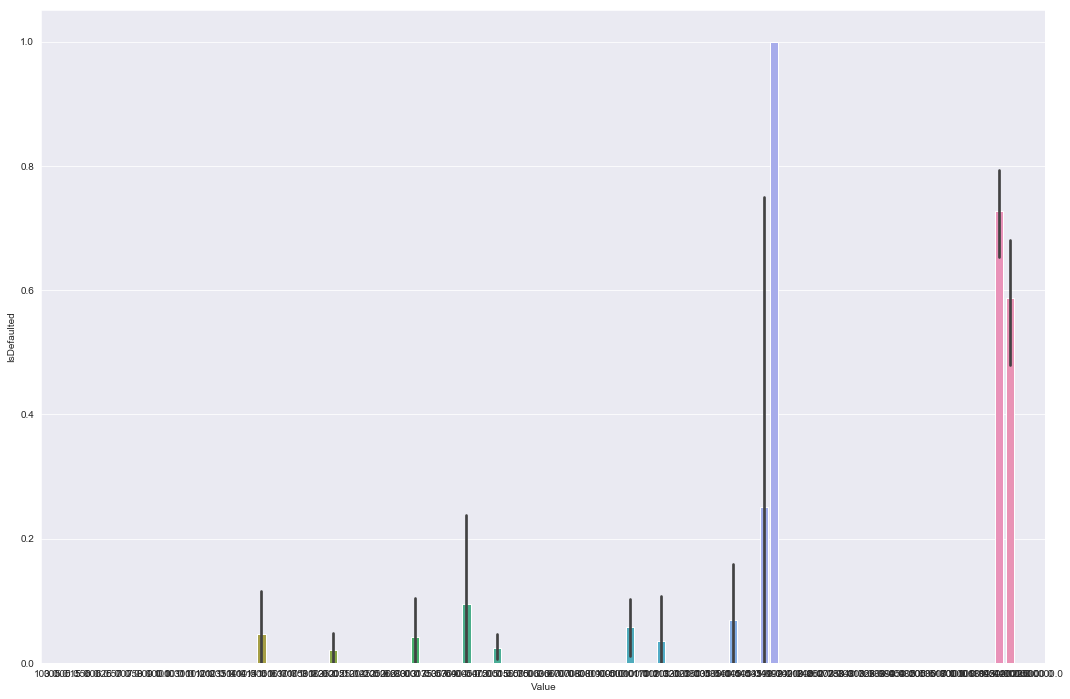

In [16]:
plt.figure(figsize=[18,12])
sns.barplot('Value', 'IsDefaulted', data=train)

#COOL, higher values are likely to be defaulted, binning these features into category will be a good feature

#we could have explore more, but the data type is messy... so Lets head to the feature engineering